# Задачи скоринга

### <font color='blue'> Задание выполнено в Python 3.5.1

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import itertools
from statsmodels.stats.weightstats import _tconfint_generic

import matplotlib.pyplot as plt
%matplotlib inline

** Подготовка данных **

In [2]:
data = pd.read_csv("credit_card_default_analysis.csv")

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


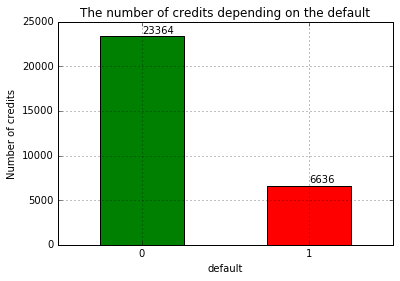

In [5]:
credit_counts = data['default'].value_counts()

credit_counts.plot(kind='bar', color='gr', grid=True, rot=0)
for i, v in enumerate(credit_counts.values):
    plt.text(i, v + 300, str(v))
plt.xlabel("default")
plt.ylabel("Number of credits")
plt.title("The number of credits depending on the default")
plt.show()

In [6]:
alpha = 0.05  # уровень значимости

## Задание 1

** Постановка задачи **

Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: <br />
a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки <br />
b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. <br />
Значимы ли полученные результаты с практической точки зрения ?

LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)

** Решение **

Построим для каждой группы (возврат/невозврат) гистаграммы распределения количества выданных кредитов в зависимости от кредитного лимита

In [7]:
pv_limit_bal = data.pivot(values='LIMIT_BAL', columns='default')
pv_limit_bal.head()

default,0,1
0,NaN,20000.0
1,NaN,120000.0
2,90000.0,NaN
3,50000.0,NaN
4,50000.0,NaN


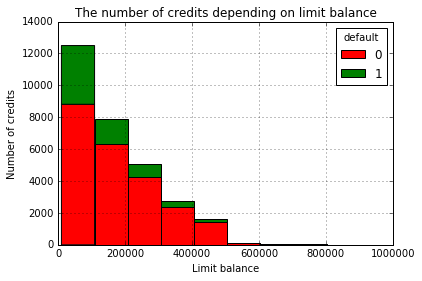

In [8]:
pv_limit_bal.plot.hist(stacked=True, color='rg')
plt.xlabel("Limit balance")
plt.ylabel("Number of credits")
plt.title("The number of credits depending on limit balance")
plt.grid()
plt.show()

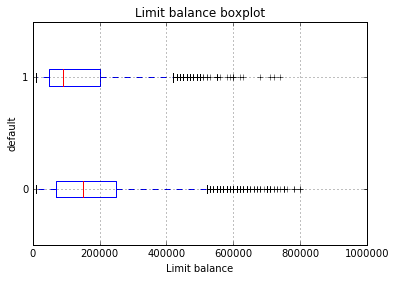

In [9]:
pv_limit_bal.plot.box(vert=False)
plt.xlabel("Limit balance")
plt.ylabel("default")
plt.title("Limit balance boxplot")
plt.grid()
plt.show()

In [10]:
repayment_limit_bal = data[data['default'] == 0]['LIMIT_BAL']  # выборка по кредитному лимиту для вернувших кредит
default_limit_bal = data[data['default'] == 1]['LIMIT_BAL']  # выборка по кредитному лимиту для НЕ вернувших кредит

repayment_median = repayment_limit_bal.median()
default_median = default_limit_bal.median()

Построение доверительных интервалов для оценки медианы так же, как для среднего: $$med({X}_n) \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$
скорее всего не корректна.

In [11]:
# repayment_std = repayment_limit_bal.std(ddof=1) / np.sqrt(repayment_limit_bal.shape[0])
# default_std = default_limit_bal.std(ddof=1) / np.sqrt(default_limit_bal.shape[0])

# repayment_interval = _tconfint_generic(repayment_median, repayment_std,
#                                        repayment_limit_bal.shape[0] - 1,
#                                        alpha, 'two-sided')
# default_interval = _tconfint_generic(default_median, default_std,
#                                      default_limit_bal.shape[0] - 1,
#                                      alpha, 'two-sided')

In [12]:
# Точечная оценка медианы кредитного лимита
# Медиана кредитного лимита для вернувших кредит:     150000.00
# Медиана кредитного лимита для НЕ вернувших кредит:   90000.00

# Интервальная оценка медианы кредитного лимита
# 95.0% доверительный интервал медианы для вернувших кредит:    [ 148312.10,  151687.90]
# 95.0% доверительный интервал медианы для НЕ вернувших кредит: [  87223.49,   92776.51]

Воспользуемся алгоритмом, изложенным на сайте <a href=http://www.machinelearning.ru/wiki/index.php?title=Интервальная_оценка>www.machinelearning.ru</a>

In [13]:
def tconfint_median(sample, alpha=0.05):
    ''' Интервальная оценка медианы для выборок с числом элементов более 50
    http://www.machinelearning.ru/wiki/index.php?title=Интервальная_оценка
    
    :param sample: выборка
    :param alpha: уровень доверия
    :return: доверительный интервал для медианы (левая_граница, правая_граница)
    '''
    n = len(sample)
    t = stats.t.ppf(q=1-alpha/2, df=n-1)
    k = 0.5 * (n - t * np.sqrt(n) - 1)
    low_idx = int(np.floor(k))
    high_idx = int(np.ceil(n - k + 1))
    variational_series = sorted(np.asarray(sample))
    return variational_series[low_idx], variational_series[high_idx]

In [14]:
repayment_interval = tconfint_median(repayment_limit_bal, alpha)
default_interval = tconfint_median(default_limit_bal, alpha)

In [15]:
print("Точечная оценка медианы кредитного лимита")
print("Медиана кредитного лимита для вернувших кредит:    {:10.2f}".format(repayment_median))
print("Медиана кредитного лимита для НЕ вернувших кредит: {:10.2f}".format(default_median))
print()
print("Интервальная оценка медианы кредитного лимита")
print("{}% доверительный интервал медианы для вернувших кредит:    [{:10.2f}, {:10.2f}]".format(
            (1 - alpha) * 100, *repayment_interval))
print("{}% доверительный интервал медианы для НЕ вернувших кредит: [{:10.2f}, {:10.2f}]".format(
            (1 - alpha) * 100, *default_interval))

Точечная оценка медианы кредитного лимита
Медиана кредитного лимита для вернувших кредит:     150000.00
Медиана кредитного лимита для НЕ вернувших кредит:   90000.00

Интервальная оценка медианы кредитного лимита
95.0% доверительный интервал медианы для вернувших кредит:    [ 150000.00,  150000.00]
95.0% доверительный интервал медианы для НЕ вернувших кредит: [  80000.00,   90000.00]


Интересно, что "некорректный" метод в данном случае даёт результат, очень близкий к "правильному".

Попробуем применить bootstrap

In [16]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha=0.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [17]:
repayment_median_scores = list(map(np.median, get_bootstrap_samples(repayment_limit_bal.values, 1000)))
default_median_scores = list(map(np.median, get_bootstrap_samples(default_limit_bal.values, 1000)))

print("{}% доверительный интервал медианы для вернувших кредит:    [{:10.2f}, {:10.2f}]".format(
            (1 - alpha) * 100, *stat_intervals(repayment_median_scores, alpha)))
print("{}% доверительный интервал медианы для НЕ вернувших кредит: [{:10.2f}, {:10.2f}]".format(
            (1 - alpha) * 100, *stat_intervals(default_median_scores, alpha)))

95.0% доверительный интервал медианы для вернувших кредит:    [ 150000.00,  150000.00]
95.0% доверительный интервал медианы для НЕ вернувших кредит: [  80000.00,   90000.00]


Bootstrap даёт такой же результат как и метод с  www.machinelearning.ru

Оценим выборку на соответствие нормальному распределению:

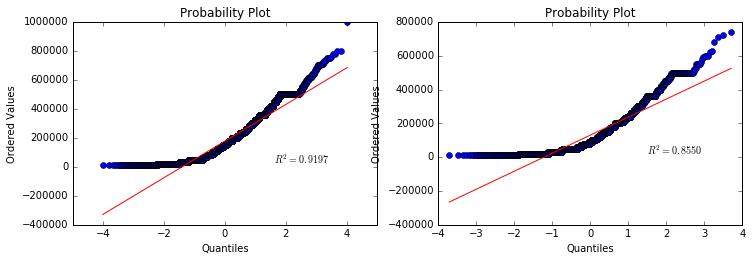

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
stats.probplot(pv_limit_bal[0].dropna(), dist="norm", plot=plt)

plt.subplot(2,2,2)
stats.probplot(pv_limit_bal[1].dropna(), dist="norm", plot=plt)
plt.show()

Обе выборки имеют значительные отклонения от нормального распределения в хвостах или это выбросы. На всякий случай критерий Стьюдента применять не будем.

Оценим возможность применения рангового критерия Манна-Уитни: размер обоих выборок должен быть не менее 20, в выборочных данных не должно быть "слишком много" повторяющихся значений. Выборки значительно больше 20. Проверим совпадающие значения в двух выборках:

In [19]:
tbl = data.pivot_table(index='LIMIT_BAL', 
     values="AGE", columns='default', aggfunc = len, fill_value=0)
tbl.head()

default,0,1
LIMIT_BAL,,
10000,296,197
16000,2,0
20000,1278,698
30000,1042,568
40000,138,92


Совпадающих значений действительно очень много, критерий Манна-Уитни не применим.

Применим перестановчный критерий для независимых выборок.

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta <\neq> 0$

В данном случае<br /> $H_0$: среднее значение кредитного лимита одинаково для вернувших и не вернувших кредит <br />
$H_1$: среднее значение отличается в этих двух группах.

Готовые функции были в тетрадке stat.non_parametric_tests_ind

In [20]:
def permutation_test_ind(sample1, sample2, max_permutations=None, alternative='two-sided'):
    ''' Перестановочный критерий (независимые выборки)

    :param sample1: выборка 1
    :param sample2: выборка 2
    :param max_combinations: количество перестановок, None - все возможные
    :param alternative: альтернатива ['two-sided', 'less', 'greater']
    :return: достигаемый уровень значимости (p-value)
    '''

    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")

    t_stat = permutation_t_stat_ind(sample1, sample2)

    zero_distr = permutation_zero_dist_ind(sample1, sample2, max_permutations)

    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)


def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]


def permutation_zero_dist_ind(sample1, sample2, max_combinations=None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)

    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                   for index in itertools.combinations(range(n), n1)]

    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [21]:
pval = permutation_test_ind(repayment_limit_bal, default_limit_bal, max_permutations=10000)
print("Достигаемый уровень значимости перестановочного критерия: {}".format(pval))
print("На уровне значимости {} нулевая гипотеза {}".format(alpha, "отвергается" if pval < alpha else "НЕ отвергается"))

Достигаемый уровень значимости перестановочного критерия: 0.0001
На уровне значимости 0.05 нулевая гипотеза отвергается


** Выводы **
* медианные значения кредитного лимита не равны, их доверительные интервалы не пересекаются;
* на заданном уровне значимости распределения выборок не равны;
* результат имеет практическую значимость - заёмщики, запрашивающие кредиты около 80-90 тыс. попадают в группу повышенного риска. Такие заявки требуют дополнительной проверки для снижения риска невозврата кредита, либо поручительства за заёмщика третьими лицами.

## Задание 2

** Постановка задачи **

Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия) 

SEX: пол клиента (1 = мужской, 2 = женский )

** Решение **

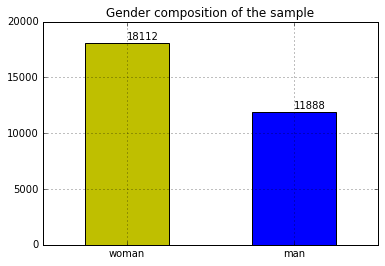

In [22]:
sex_dict = {1: "man", 2: "woman"}
sex_counts = data['SEX'].value_counts().rename(sex_dict)

sex_counts.plot(kind='bar', color='yb', grid=True, rot=0)
for i, v in enumerate(sex_counts.values):
    plt.text(i, v + 300, str(v))
plt.title("Gender composition of the sample")
plt.show()

Составим таблицу сопряжёности вида

| Мужчины (SEX=1) | Женщины (SEX=2) |
:---: | :---: |:-: |
** Вернули кредит (default=0) ** |    | 
** Не вернули кредит (default=1) ** |    |  

In [23]:
table_sex = data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='SEX', aggfunc = len, fill_value=0)
table_sex.head()

SEX,1,2
default,,
0,9015,14349
1,2873,3763


И визуализируем её и получим гендерный состав в зависимости от возврата кредита

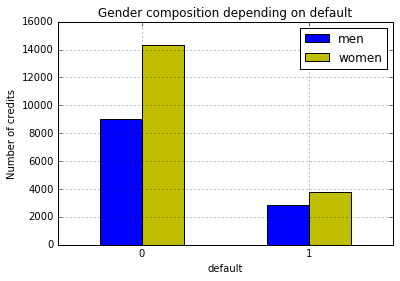

In [24]:
table_sex.plot.bar(color='by', rot=0)
plt.xlabel("default")
plt.ylabel("Number of credits")
plt.title("Gender composition depending on default")
plt.legend(["men", "women"])
plt.grid()

plt.show()

Проверим гипотезу гипотезу о совпадении гендерного состава в обоих выборках. Предполагаем, что выборки имеют распределения Бернулли с распределениями $Ber(p_{1})$ и $Ber(p_{2})$.

$H_{0} \colon p_{1} = p{2}$

$H_{1} \colon p_{1} < \neq > p_{2}$

В данном случае <br />
$H_0$: гендерный состав групп совпадает <br />
$H_1$: гендерный состав групп различается

Для проверки с помощью доверительного интервала воспользуемся готовой функцией ** proportions_diff_confint_ind ** из лекции. В связи с тем, что выборки, подаваемые на вход функции должны состоять только из [0, 1], а в заданные выборки состоят из [1, 2] требуется конвертация данных. Будем заменять 2 на 0.

In [25]:
def proportions_diff_confint_ind(sample1, sample2, alpha=0.05):
    ''' Доверительный интервал для разности долей (независимые выборки)

    :param sample1: выборка 1 с бинарными значениями [0, 1]
    :param sample2: выборка 2 с бинарными значениями [0, 1]
    :param alpha: уровень доверия
    :return: доверительный интервал для разности долей (левая_граница, правая_граница)
    '''

    z = stats.norm.ppf(1 - alpha / 2.)

    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)

    left_boundary = (p1 - p2) - z * np.sqrt(
        p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(
        p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))

    return (left_boundary, right_boundary)

In [26]:
repayment_sex = data[data['default'] == 0]['SEX']  # выборка по полу для вернувших кредит
default_sex = data[data['default'] == 1]['SEX']  # выборка по полу для НЕ вернувших кредит

In [27]:
interval = proportions_diff_confint_ind(list(map(lambda x: 0 if x == 2 else x, repayment_sex)),
                                        list(map(lambda x: 0 if x == 2 else x, default_sex)),
                                        alpha)
print("{}% доверительный интервал для разности долей: [{:5.2f}, {:5.2f}]".format((1 - alpha) * 100, *interval))

95.0% доверительный интервал для разности долей: [-0.06, -0.03]


Доверительный интеравал для разности долей мужчин и женщин не содержит нуля, следовательно, гендерный состав групп вернувших кредит и не вернувших кредит различный.

Для проверки гипотезы с помощью статистического критерия применим точный тест Фишера, который не имеет ограничений (для таблиц более 2х2 ограничения только вычислительные), в отличии от критерия хи-квадрат.

In [28]:
oddsratio, pval = stats.fisher_exact(table_sex.values, alternative='two-sided')
print("Отношение шансов: {:.2f}".format(oddsratio))
print("Достигаемый уровень значимости {}".format(pval))
print("На уровне значимости {} нулевая гипотеза {}".format(alpha, "отвергается" if pval < alpha else "НЕ отвергается"))

Отношение шансов: 0.82
Достигаемый уровень значимости 5.252838052105445e-12
На уровне значимости 0.05 нулевая гипотеза отвергается


** Выводы **
* на заданном уровне значимости точный тест Фишера также как доверительный интервал свидетельствует о различии гендерного состава в группах;
* на основании рассчитанного отношения шансов (и доверительного интервала) можно сделать вывод, что в группе не вернувших кредит, доля женщин снижается, а доля мужчин увеличивается;
* результат имеет практическую значимость - среди не вернувших кредит больше заёмщиков-мужчин. Мужчин нужно дополнительно проверять для снижения риска невозврата кредита, или включать условие о поручителях (желательно, чтобы среди них были женщины).

## Задание 3

** Постановка задачи **

Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности, где значением ячейки была бы разность между количеством человек вернувших и не вернувших долг по каждому из значений образования. Похожи ли значения в этой таблице ? Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).

** Решение **

In [29]:
edu_names = ["Ph.D.", "Master", "Bachelor", "Graduate school", "Elementary education", "N/A"]

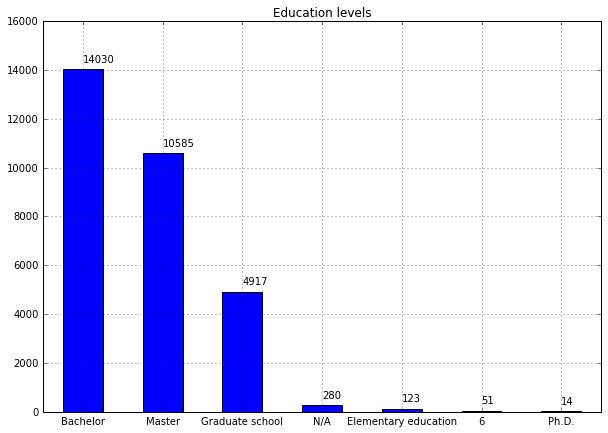

In [30]:
edu_counts = data['EDUCATION'].value_counts().rename({idx: name for (idx, name) in enumerate(edu_names)})

edu_counts.plot(kind='bar', grid=True, rot=0, figsize=(10, 7))
for i, v in enumerate(edu_counts.values):
    plt.text(i, v + 300, str(v))
plt.title("Education levels")
plt.show()

In [31]:
table_edu = data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='EDUCATION', aggfunc = len, fill_value=0)
table_edu.head()

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,14,8549,10700,3680,116,262,43
1,0,2036,3330,1237,7,18,8


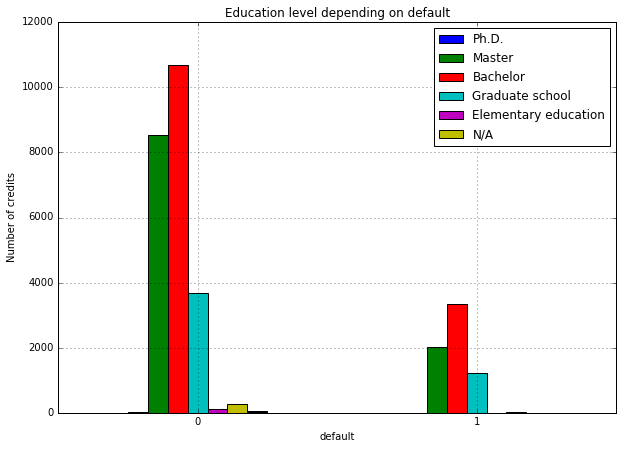

In [32]:
table_edu.plot.bar(rot=0, figsize=(10, 7))
plt.xlabel("default")
plt.ylabel("Number of credits")
plt.title("Education level depending on default")
plt.legend(edu_names)
plt.grid()
plt.show()

Проверим гипотезу о том, что образование не влияет на то, вернет ли человек долг с помощбю критерия хи-квадрат.

Убедимся в правомерности применения статистики хи-квадрат в соответствии с правилами:
* количество объектов в таблице сопряжённости $$n \geq 40$$
* ожидаемое количество элементов в таблице $${n_{i+} n_{+j} \over n} < 5 \text{ не более, чем в 20% случаев}$$

In [33]:
def chi2_validity_info(table):
    n = np.sum(table) # сумма элементов
    ni = np.sum(table, axis=1) # сумма по строкам
    nj = np.sum(table, axis=0) # сумма по столбцам
    total_cases_count = table.shape[0] + table.shape[1]
    less5_cases_count = 0
    for i in range(table.shape[0]):
        for j in range(table.shape[1]):
            if float(ni[i] * nj[j]) / n < 5:
                less5_cases_count += 1
    less5_cases_percent = float(less5_cases_count) / total_cases_count * 100
    return n, less5_cases_percent

In [34]:
n, less5_cases_percent = chi2_validity_info(table_edu.values)
print("Количество элементов в таблице сопряженности n = {}  при норме n >= 40".format(n))
print("Первое правило {}".format("не нарушается" if n >=40 else "НАРУШАЕТСЯ"))
print()
print("(ni+ * n+j) / n < 5 в {:.1f}% случаев  при норме не более 20%".format(less5_cases_percent))
print("Второе правило {}".format("не нарушается" if less5_cases_percent < 20 else "НАРУШАЕТСЯ"))
print()
if n >= 20 and less5_cases_percent < 20:
    print("Применение критерия хи-квадрат правомерно")
else:
    print("Применение критерия хи-квадрат НЕ ПРАВОМЕРНО !")

Количество элементов в таблице сопряженности n = 30000  при норме n >= 40
Первое правило не нарушается

(ni+ * n+j) / n < 5 в 11.1% случаев  при норме не более 20%
Второе правило не нарушается

Применение критерия хи-квадрат правомерно


$H_0\colon MCC_{X_1 X_2} = 0$

$H_1\colon MCC_{X_1 X_2} \neq 0$

В данном случае <br />
$H_0$: уровень образования не влияет на возврат кредита <br />
$H_1$: влияет

In [35]:
chi2, pval, dof, ex = stats.chi2_contingency(table_edu.values)
print("Критерий хи-квадрат {:.4f}, достигаемый уровень значимости {}".format(chi2, pval))
print("На уровне значимости {} нулевая гипотеза {}".format(alpha, "отвергается" if pval < alpha else "НЕ отвергается"))

Критерий хи-квадрат 163.2166, достигаемый уровень значимости 1.2332626245415605e-32
На уровне значимости 0.05 нулевая гипотеза отвергается


Визуализируем разницу в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг:

In [36]:
table_diff_edu1 = pd.DataFrame(data=ex-table_edu.values, columns=table_edu.columns)
table_diff_edu1.rename(index={0: "default=0", 1: "default=1"}, inplace=True)
table_diff_edu1.head()

EDUCATION,0,1,2,3,4,5,6
default=0,-3.0968,-305.402,226.564,149.3596,-20.2076,-43.936,-3.2812
default=1,3.0968,305.402,-226.564,-149.3596,20.2076,43.936,3.2812


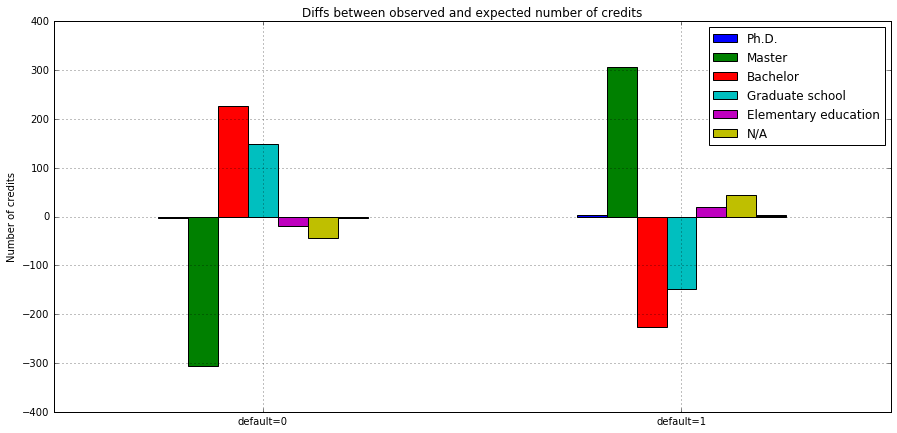

In [37]:
table_diff_edu1.plot.bar(rot=0, figsize=(15, 7))
plt.ylabel("Number of credits")
plt.title("Diffs between observed and expected number of credits")
plt.legend(edu_names)
plt.grid()
plt.show()

Значения очень похожи - они зеркально противоположны для default=0 и default=1

Визуализируем разность между количеством человек вернувших и не вернувших долг по каждому из значений образования

In [38]:
table_diff_edu2 = pd.DataFrame(data=(table_edu.loc[0] - table_edu.loc[1]).reshape(1,7),
                               columns=table_edu.columns, index = ["difference"])
table_diff_edu2.head()

EDUCATION,0,1,2,3,4,5,6
difference,14,6513,7370,2443,109,244,35


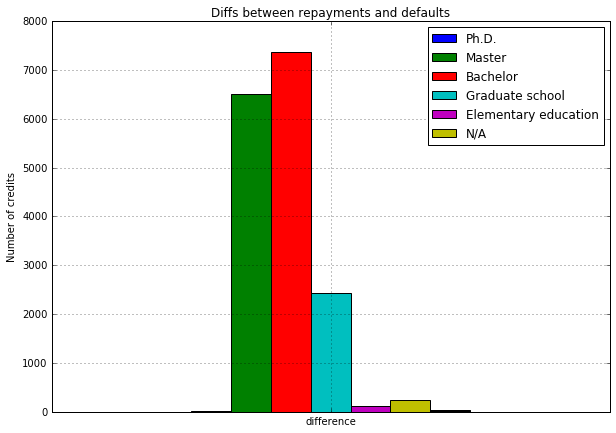

In [39]:
table_diff_edu2.plot.bar(rot=0, figsize=(10, 7))
plt.ylabel("Number of credits")
plt.title("Diffs between repayments and defaults")
plt.legend(edu_names)
plt.grid()
plt.show()

Модифицируем таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости. Для этого разделим каждое значение разности на количество людей в этой подгруппе. Полученные значения - эффективность возврата кредита, чем значение больше, тем больше доля людей в ээтой группе, которые вернули кредит.

In [40]:
diff_edu2_scaled = (table_edu.loc[0] - table_edu.loc[1]) / ((table_edu.loc[0] + table_edu.loc[1]))
table_diff_edu2_scaled = pd.DataFrame(data=diff_edu2_scaled.reshape(1,7),
                                      columns=table_edu.columns, index = ["scaled_difference"])
table_diff_edu2_scaled.head()

EDUCATION,0,1,2,3,4,5,6
scaled_difference,1.0,0.615305,0.525303,0.496848,0.886179,0.871429,0.686275


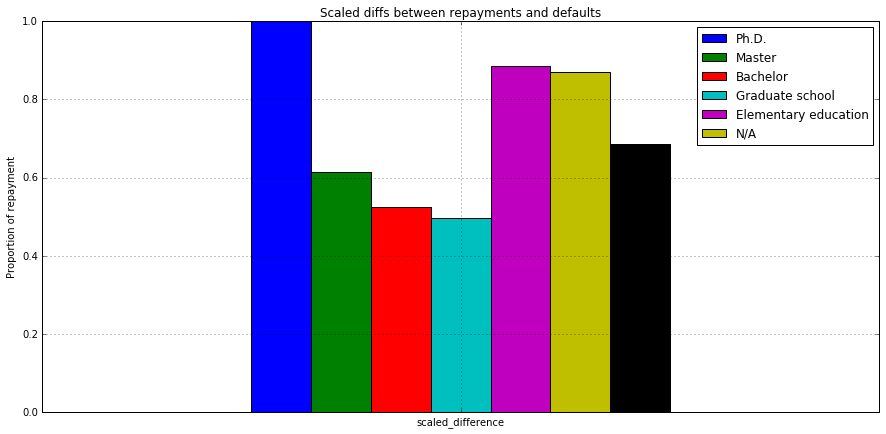

In [41]:
table_diff_edu2_scaled.plot.bar(rot=0, figsize=(15, 7))
plt.ylabel("Proportion of repayment")
plt.title("Scaled diffs between repayments and defaults")
plt.legend(edu_names)
plt.grid()
plt.show()

** Выводы **

* на заданном уровне значимости критерий хи-квадрат свидетельствует о зависимости возврата кредита от уровня образования заёмщика;
* хуже всего возвращают кредиты лица с образованием "выпускник школы" и "бакалавр", Лучше всего - доктора (их доля в выборке мала и результат может быть не репрезентативным) и магистры;
* практическая ценность - снижения риска невозврата путём дополнительныых проверок бакалавров и выпускников школ перед выдачей кредита. Либо выдвигать требования о поручителях или о безусловном материальном обеспечении выдаваемого кредита.

## Задание 4

** Постановка задачи **

Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.


MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

** Решение **

In [42]:
mar_names = ["refused", "married", "single", "N/A"]

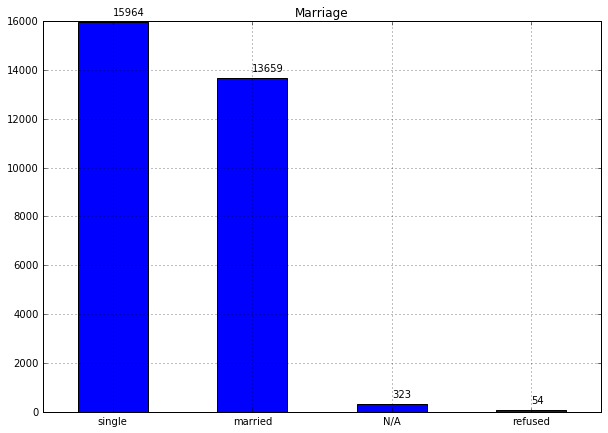

In [43]:
mar_counts = data['MARRIAGE'].value_counts().rename({idx: name for (idx, name) in enumerate(mar_names)})

mar_counts.plot(kind='bar', grid=True, rot=0, figsize=(10, 7))
for i, v in enumerate(mar_counts.values):
    plt.text(i, v + 300, str(v))
plt.title("Marriage")
plt.show()

In [44]:
table_mar = data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='MARRIAGE', aggfunc = len, fill_value=0)
table_mar.head()

MARRIAGE,0,1,2,3
default,,,,
0,49,10453,12623,239
1,5,3206,3341,84


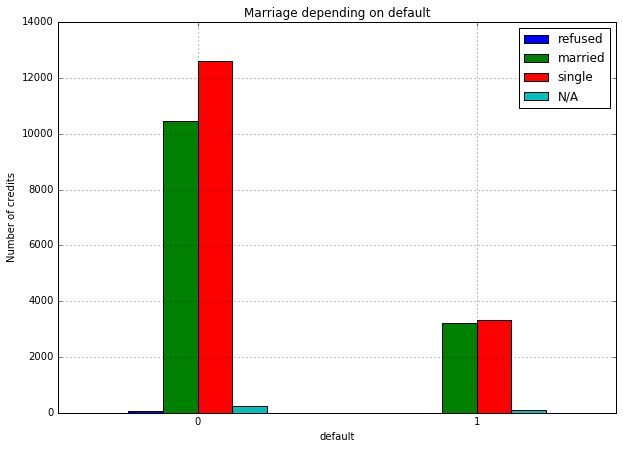

In [45]:
table_mar.plot.bar(rot=0, figsize=(10, 7))
plt.xlabel("default")
plt.ylabel("Number of credits")
plt.title("Marriage depending on default")
plt.legend(mar_names)
plt.grid()
plt.show()

Проверим, как связан семейный статус с индикатором дефолта: посчитаем посчитаем коэффициент V Крамера, предварительно проверив применимость критерия хи-квадрат (через хи-квадрат будем вычитслять достигаемый уровень значимости коэффициента V Крамера):

In [46]:
n, less5_cases_percent = chi2_validity_info(table_mar.values)
print("Количество элементов в таблице сопряженности n = {}  при норме n >= 40".format(n))
print("Первое правило {}".format("не нарушается" if n >=40 else "НАРУШАЕТСЯ"))
print()
print("(ni+ * n+j) / n < 5 в {:.1f}% случаев  при норме не более 20%".format(less5_cases_percent))
print("Второе правило {}".format("не нарушается" if less5_cases_percent < 20 else "НАРУШАЕТСЯ"))
print()
if n >= 20 and less5_cases_percent < 20:
    print("Применение критерия хи-квадрат правомерно")
else:
    print("Применение критерия хи-квадрат НЕ ПРАВОМЕРНО !")

Количество элементов в таблице сопряженности n = 30000  при норме n >= 40
Первое правило не нарушается

(ni+ * n+j) / n < 5 в 0.0% случаев  при норме не более 20%
Второе правило не нарушается

Применение критерия хи-квадрат правомерно


In [47]:
def cramerV(contigency_table):
    '''Коэффициент корреляции V Крамера для двух категориальных переменных

    :param contigency_table: таблица сопряжённости
    :return: коэффициент корреляции V Крамера и достигаемый уровень значимости (p-value)
    '''

    table = np.asarray(contigency_table)
    chi2, pvalue, dof, ex = stats.chi2_contingency(table)
    k1 = table.shape[0]
    k2 = table.shape[1]
    n = np.sum(table)  # сумма элементов в таблице сопряжённости
    phi_c = np.sqrt(chi2 / (n * (min(k1, k2) - 1)))
    return phi_c, pvalue

In [48]:
phi_c, pval = cramerV(table_mar)
chi2, pval, dof, ex = stats.chi2_contingency(table_edu.values)
print("Коэффициент V Крамера {:.4f}, достигаемый уровень значимости {}".format(phi_c, pval))
print("На уровне значимости {} отличие от нуля коээффициента V Крамера {}".format(alpha, "НЕ значимо" if pval < alpha else "значимо"))

Коэффициент V Крамера 0.0345, достигаемый уровень значимости 1.2332626245415605e-32
На уровне значимости 0.05 отличие от нуля коээффициента V Крамера НЕ значимо


** Вывод **

* на уровне значимости 0.05 семейное положение заёмщика не связано с возвратом или неозвратом им кредита;
* косвенная практическая значимость данного утверждения в том, что не требуется дополнительно проверять людей с каким-то конкретным семейным положением, не отвлекать на это ресурсы и лишний раз не отказывать в выдаче кредита. Прямой практической значимости нет.

## Задание 5

** Постановка задачи **

Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?
        
AGE: возраст в годах        

** Решение **

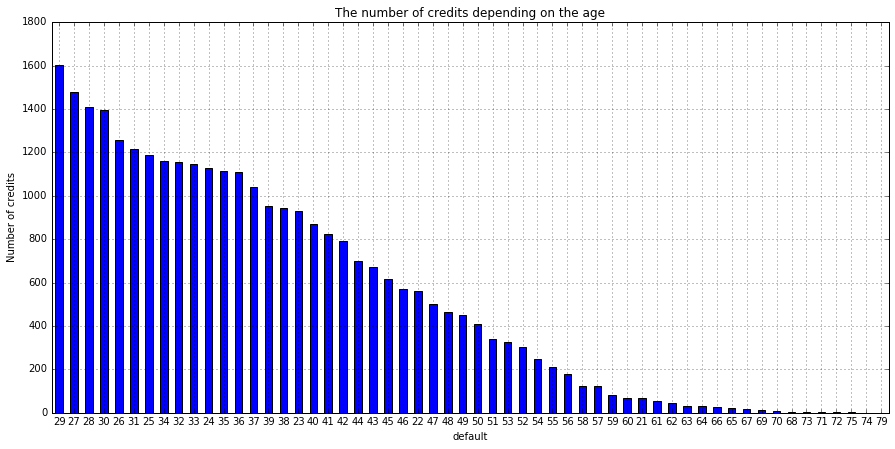

In [49]:
credit_counts = data['AGE'].value_counts()

credit_counts.plot(kind='bar', grid=True, rot=0, figsize=(15, 7))
plt.xlabel("default")
plt.ylabel("Number of credits")
plt.title("The number of credits depending on the age")
plt.show()

In [50]:
pv_limit_age = data.pivot(values='AGE', columns='default')
pv_limit_age.head()

default,0,1
0,NaN,24.0
1,NaN,26.0
2,34.0,NaN
3,37.0,NaN
4,57.0,NaN


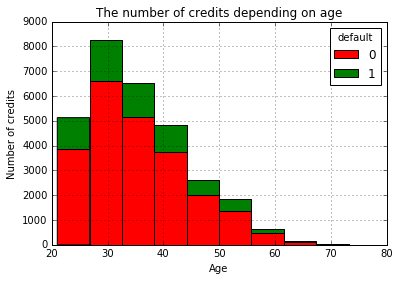

In [51]:
pv_limit_age.plot.hist(stacked=True, color='rg')
plt.xlabel("Age")
plt.ylabel("Number of credits")
plt.title("The number of credits depending on age")
plt.grid()
plt.show()

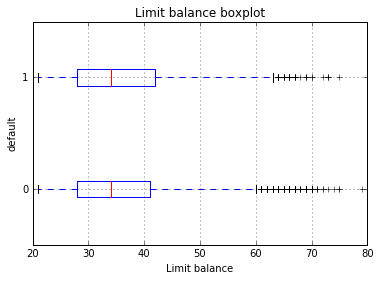

In [52]:
pv_limit_age.plot.box(vert=False)
plt.xlabel("Limit balance")
plt.ylabel("default")
plt.title("Limit balance boxplot")
plt.grid()
plt.show()

In [53]:
repayment_age = data[data['default'] == 0]['AGE']  # выборка по возрастам для вернувших кредит
default_age = data[data['default'] == 1]['AGE']  # выборка по возрвстам для НЕ вернувших кредит

repayment_age_median = repayment_age.median()
default_age_median = default_age.median()

In [54]:
repayment_age_interval = tconfint_median(repayment_age, alpha)
default_age_interval = tconfint_median(default_age, alpha)

In [55]:
print("Точечная оценка медианы возраста")
print("Медиана возраста для вернувших кредит:    {:10.2f}".format(repayment_age_median))
print("Медиана возраста для НЕ вернувших кредит: {:10.2f}".format(default_age_median))
print()
print("Интервальная оценка медианы возраста")
print("{}% доверительный интервал медианы для вернувших кредит:    [{:10.2f}, {:10.2f}]".format(
            (1 - alpha) * 100, *repayment_age_interval))
print("{}% доверительный интервал медианы для НЕ вернувших кредит: [{:10.2f}, {:10.2f}]".format(
            (1 - alpha) * 100, *default_age_interval))

Точечная оценка медианы возраста
Медиана возраста для вернувших кредит:         34.00
Медиана возраста для НЕ вернувших кредит:      34.00

Интервальная оценка медианы возраста
95.0% доверительный интервал медианы для вернувших кредит:    [     34.00,      34.00]
95.0% доверительный интервал медианы для НЕ вернувших кредит: [     34.00,      35.00]


Применим bootstrap

In [56]:
repayment_median_scores = list(map(np.median, get_bootstrap_samples(repayment_age.values, 1000)))
default_median_scores = list(map(np.median, get_bootstrap_samples(default_age.values, 1000)))

print("{}% доверительный интервал медианы для вернувших кредит:    [{:10.2f}, {:10.2f}]".format(
            (1 - alpha) * 100, *stat_intervals(repayment_median_scores, alpha)))
print("{}% доверительный интервал медианы для НЕ вернувших кредит: [{:10.2f}, {:10.2f}]".format(
            (1 - alpha) * 100, *stat_intervals(default_median_scores, alpha)))

95.0% доверительный интервал медианы для вернувших кредит:    [     34.00,      34.00]
95.0% доверительный интервал медианы для НЕ вернувших кредит: [     34.00,      35.00]


Обе методики дали одинаковый результат.

Медианы возраста вернувших и не вернувших кредиты совпадают, а их интервальные оценки - неодинаковы и пересекаются. Нельзя дать однозначный ответ о равенстве медиан.

Применим перестановочный критерий для оценки равенства медиан возрастов в каждой группе.

Гипотезы:

$H_0$: медианы возраста одинаковы для вернувших и не вернувших кредит <br />
$H_1$: медианы возраста отличается в этих двух группах.

In [57]:
pval = permutation_test_ind(repayment_age, default_age, max_permutations=10000)
print("Достигаемый уровень значимости перестановочного критерия: {}".format(pval))
print("На уровне значимости {} нулевая гипотеза {}".format(alpha, "отвергается" if pval < alpha else "НЕ отвергается"))

Достигаемый уровень значимости перестановочного критерия: 0.0148
На уровне значимости 0.05 нулевая гипотеза отвергается



Попробуем применить критерий Стьюдента к гипотезам, указанным выше. В случае нормального распределения медиана равна мат.ожиданию, поэтому применить критерий Стьюдента для проверки равенства медиан выборок правомерно.

Критерий Стьюдента требует нормального распределения значений в выборках. Оценим нормальность на основании на основании ку-ку графика. 

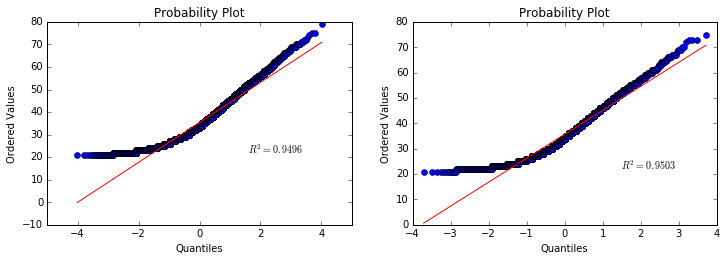

In [58]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
stats.probplot(pv_limit_age[0].dropna(), dist="norm", plot=plt)

plt.subplot(2,2,2)
stats.probplot(pv_limit_age[1].dropna(), dist="norm", plot=plt)
plt.show()

Выборки не сильно отличаются от нормальных. Функция вычисления критерия Шапиро-Уилка в ** scipy ** не работает с выборками более 5000, поэтому проверить на нормальность с помощью этого критерия не получится (выборка слишком большая).


In [59]:
st, pval = stats.ttest_ind(repayment_age, default_age, equal_var = False)
print("Достигаемый уровень значимости перестановочного критерия: {}".format(pval))
print("На уровне значимости {} нулевая гипотеза {}".format(alpha, "отвергается" if pval < alpha else "НЕ отвергается"))

Достигаемый уровень значимости перестановочного критерия: 0.02038649025587463
На уровне значимости 0.05 нулевая гипотеза отвергается


** Выводы **

* медианные значения возрастов групп на заданном уровне значимости не равны;
* результат не имеет практической значимости, т.к. разница в медиане возраста слишком мала для оценки надёжности заёмщика.